# **Logistic Regression**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')

In [3]:
df=pd.read_csv('/content/B_practice.csv')

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [12]:
df.lt(0).sum()

ID                     0
Age                    0
Experience            52
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [13]:
# change negative to positive
df['Experience']= abs(df['Experience'])

In [14]:
# Print the number of records with and without Personal Loan
print("Number of records in each label are")
print(df['Personal Loan'].value_counts())

# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['Personal Loan'].value_counts() * 100 / df.shape[0], "\n")

# Print the first five rows of Dataframe.
df.head()

Number of records in each label are
0    4520
1     480
Name: Personal Loan, dtype: int64

Percentage of records in each label are
0    90.4
1     9.6
Name: Personal Loan, dtype: float64 



,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [15]:
#change it into year vise
df['CCAvg']=df['CCAvg']*12

In [16]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,19.2,1,0,0,1,0,0,0
1,2,45,19,34,3,18.0,1,0,0,1,0,0,0
2,3,39,15,11,1,12.0,1,0,0,0,0,0,0
3,4,35,9,100,1,32.4,2,0,0,0,0,0,0
4,5,35,8,45,4,12.0,2,0,0,0,0,0,1


In [20]:
df.nunique()


ID                    5000
Age                     45
Experience              44
Income                 162
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [22]:
df.drop('ID',axis=1,inplace=True)
df.drop('ZIP Code', axis=1, inplace=True)

###Sigmoid Function

The sigmoid function, in maths, classifies any data point between **0** and **1**. The graph of a sigmoid function follows the shape of English letter **S**. Mathematically, the sigmoid function is given as

$$y =  \frac{1}{1 + e^{-x}}$$

where,  

- $y$ is the output of the sigmoid function

- $x$ is an independent variable

- $e$ is Euler's constant

The $x$ takes all the values between $- \infty$ to $\infty$ i.e., $x \in (-\infty, \infty)$ and the $y$ ranges between $0$ to $1$ i.e., $y \in (0, 1)$.

In [23]:
def sigmoid(x):
    return pd.Series(1 / ( 1 + np.exp(-x)))

In [24]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

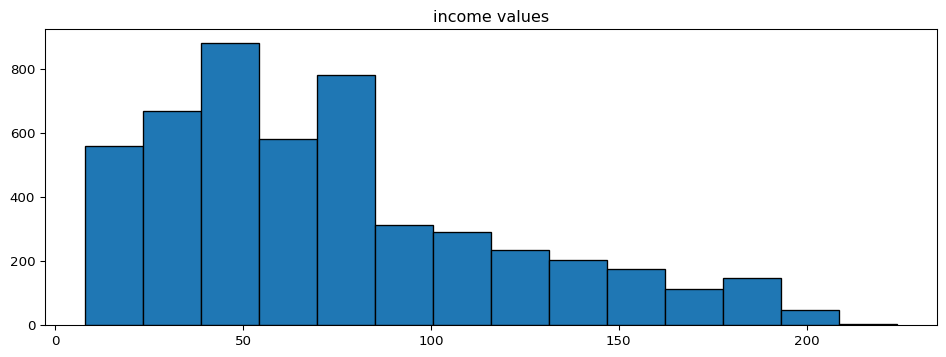

In [27]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("income values")
plt.hist(df['Income'], bins = 'sturges', edgecolor = 'black')
plt. show()

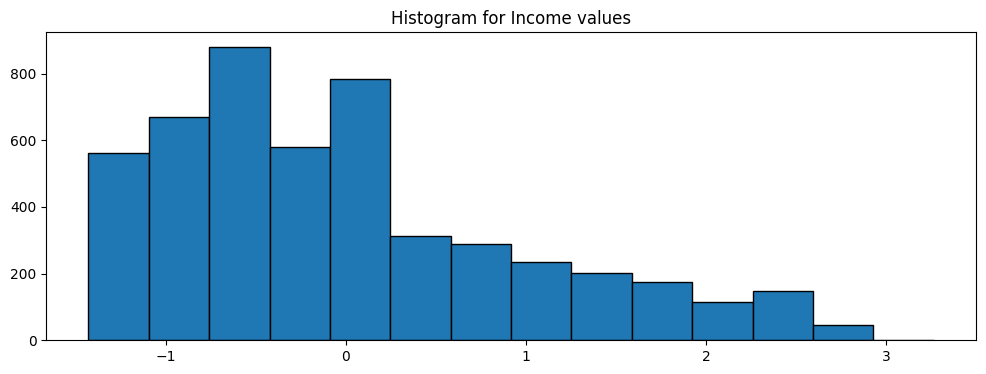

In [28]:
def standard_scalar(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
scaled_Income = standard_scalar(df['Income'])

plt.figure(figsize = (12,4))
plt.title("Histogram for Income values")
plt.hist(scaled_Income, bins = 'sturges', edgecolor = 'black')
plt.show()

In [26]:
income_sig_output = sigmoid(df['Income'])
income_sig_output.describe()

count    5000.000000
mean        0.999997
std         0.000025
min         0.999665
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Income, dtype: float64

In [29]:
scaled_income_sig_output = sigmoid(scaled_Income)
scaled_income_sig_output.describe()

count    5000.000000
mean        0.489328
std         0.208345
min         0.193282
25%         0.319644
50%         0.447117
75%         0.628611
max         0.963151
Name: Income, dtype: float64

In [30]:
def predict(sig_output, threshold):
    y_pred = [ 1 if output >= threshold else 0 for output in sig_output]
    return pd.Series(y_pred)

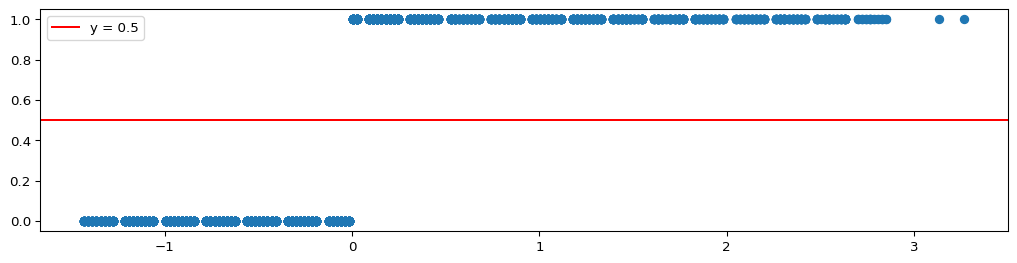

In [31]:
threshold = 0.5
Personal_Loan_pred = predict(scaled_income_sig_output, threshold)

plt.figure(figsize=(13,3), dpi = 96)
plt.scatter(scaled_Income, Personal_Loan_pred)
plt.axhline(y = threshold, label = f'y = { threshold }', color = 'r')
plt. legend()
plt.show()

In [33]:

print(f"Threshold value: {threshold}")
print(f"\nPredicted value counts:\n{Personal_Loan_pred.value_counts()}")
print(f"\nActual value counts:\n{df['Personal Loan']. value_counts()}")


Threshold value: 0.5

Predicted value counts:
0    2866
1    2134
dtype: int64

Actual value counts:
0    4520
1     480
Name: Personal Loan, dtype: int64


In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Personal Loan'], Personal_Loan_pred))

[[2860 1660]
 [   6  474]]


In [35]:
from sklearn.metrics import classification_report

print(classification_report(df['Personal Loan'], Personal_Loan_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      4520
           1       0.22      0.99      0.36       480

    accuracy                           0.67      5000
   macro avg       0.61      0.81      0.57      5000
weighted avg       0.92      0.67      0.73      5000



In [36]:
#Split the training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Personal Loan')
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [39]:
#Create a multivariate logistic regression model. Also, predict the target values for the train set.
from sklearn.linear_model import LogisticRegression

log_clf_1 = LogisticRegression()
log_clf_1.fit(X_train, y_train)
print(log_clf_1.score(X_train, y_train))

#Predict the target values for the train set.
y_train_pred = log_clf_1.predict(X_train)

print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))

print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))

0.9497142857142857

 Confusion Matrix 

[[3130   47]
 [ 129  194]]

 Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.80      0.60      0.69       323

    accuracy                           0.95      3500
   macro avg       0.88      0.79      0.83      3500
weighted avg       0.95      0.95      0.95      3500

